In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile

# Table 3: 2020 American National Election Studies

This table is from the American National Election Studies 2020 Time Series Study. This survey asked partiticants questions over various ranges of topics at two different times in 2020: pre-election and post-election. For simplicity, only the pre-election questions were considered here. Some variables of interest are participant personal information, political ideology/opinions, media opinions, Covid-19 opinions, and financial situation information. This information could investigate questions such as, "Do political parties have different feelings about media or Covid-19?" and "Does a person's financial situation relate to political party or Covid-19?".

First, after reading in the dataset, variables of interest were selected and sorted into different tables for organization and simplicity.

In [3]:
anes_df = pd.read_csv("/Users/colletteriviere/Downloads/anes_timeseries_2020_csv_20220210/anes_timeseries_2020_csv_20220210.csv",low_memory=False)

voterinfo_df = anes_df[['V201013a','V201013b','V201018','V201021','V201029','V201029z','V201101','V201102','V201103','V201103z','V201104','V201105','V201105z','V201114','V201118','V201119','V201120','V201121','V201122','V201142','V201143','V201144x',
            'V201156','V201157','V201200','V201201','V201228','V201228z','V201229','V201230','V201231x','V201244','V201373','V201374','V201375x','V201376','V201377','V201390','V201391','V201392x','V201393','V201394','V201395','V201396x',
            'V201433','V201435','V201452','V201453','V201458x','V201462','V201502','V201503','V201510','V201510z','V201511x','V201519','V201529','V201539','V201540',
            'V201541','V201568a','V201568b','V201568c','V201568d','V201568e','V201575','V201575z','V201594','V201600','V201601','V201601z','V201617x','V201624','V201625','V201629a','V201629b','V201629c','V201629d','V201629e']].copy()

voterinfo_df.rename({'V201013a':'StateRegistratedAddress','V201013b':'StateRegistrated','V201018':'PartyRegistration','V201021':'PrimaryPresVote','V201029':'GeneralPresVote','V201029z':'GeneralPresVote_other',
'V201101':'VotePres2016_rev_YN','V201102':'VotePres2016_YN','V201103':'WhoVotePres2016','V201103z':'WhoVotePres2016_other','V201104':'VotePres2012_YN','V201105':'WhoVotePres2012','V201105z':'WhoVotePres2012_other','V201114':'CountryOnTrack',
'V201118':'AngryAboutCountry','V201119':'HappyAboutCountry','V201120':'WorriedAboutCountry','V201121':'ProudAboutCountry','V201122':'IrritatedAboutCountry','V201142':'ApprovePresHandleCovid','V201143':'ApprovePresHandleCovid_howmuch',
'V201144x':'ApprovePresHandleCovid_summary','V201156':'RateDemParty','V201157':'RateRepParty','V201200':'SelfLib_ConsScale','V201201':'SelfLib_Con_Mod','V201228':'SelfParty','V201228z':'SelfParty_other','V201229':'SelfParty_strong',
'V201230':'SelfParty_closer','V201231x':'SelfParty_summary','V201244':'PartyHandlingCovid','V201373':'RestrictJournalistAccess','V201374':'RestrictJournalistAccess_strength','V201375x':'RestrictJournalistAccess_summary',
'V201376':'ConcernGovUndermineMedia','V201377':'TrustInNewsMedia','V201390':'FedGovResponseCovid_speed','V201391':'FedGovResponseCovid_strength','V201392x':'FedGovResponseCovid_summary','V201393':'CovidLimits',
'V201394':'CovidLimits_speed','V201395':'CovidLimits_strength','V201396x':'CovidLimits_summary','V201433':'ReligionImportant','V201435':'SelfReligion','V201452':'AttendChurch_YN','V201453':'AttendChurch_frequency','V201458x':'SelfReligion_summary',
'V201462':'ReligiousBeliefs','V201502':'YearAgoFinanciallyBetter','V201503':'NextYearFinanciallyBetter','V201510':'EducationLevel','V201510z':'EducationLevel_other','V201511x':'EducationLevel_summary','V201519':'LastWeekLayoff_YN','V201529':'SelfEmployment',
'V201539':'OOWorLaidoff_last6months','V201540':'WorryLosingJob_future','V201541':'RedInHoursOrPay_last6months','V201568a':'KidSchool_public','V201568b':'KidSchool_private_religious','V201568c':'KidSchool_private','V201568d':'KidSchool_homeschool',
'V201568e':'KidSchool_noschool','V201575':'SelfGrewUp','V201575z':'SelfGrewUp_other','V201594':'WorriedCurrentFinancialSit','V201600':'SelfSex','V201601':'SelfSexualOrientation','V201601z':'SelfSexualOrientation_other','V201617x':'TotalFamilyIncome',
'V201624':'HouseholdCovid_pos','V201625':'HouseholdCovid_symp','V201629a':'PresCampaignMedia_TV','V201629b':'PresCampaignMedia_newspaper','V201629c':'PresCampaignMedia_internet','V201629d':'PresCampaignMedia_radio','V201629e':'PresCampaignMedia_none'
        },axis='columns',inplace=True)


selfinfo_df = voterinfo_df[['StateRegistratedAddress', 'StateRegistrated', 'ReligionImportant', 'SelfReligion', 'AttendChurch_YN', 'AttendChurch_frequency', 'SelfReligion_summary', 'ReligiousBeliefs', 'EducationLevel', 'EducationLevel_other', 'EducationLevel_summary', 'SelfGrewUp', 'SelfGrewUp_other', 'SelfSex', 'SelfSexualOrientation', 'SelfSexualOrientation_other']]
partyinfo_df = voterinfo_df[['PartyRegistration','PrimaryPresVote','GeneralPresVote','GeneralPresVote_other','VotePres2016_rev_YN','VotePres2016_YN','WhoVotePres2016','WhoVotePres2016_other','VotePres2012_YN','WhoVotePres2012','WhoVotePres2012_other','RateDemParty','RateRepParty','SelfLib_ConsScale','SelfLib_Con_Mod','SelfParty','SelfParty_other','SelfParty_strong','SelfParty_closer','SelfParty_summary']]
feelingsinfo_df = voterinfo_df[['CountryOnTrack','AngryAboutCountry','HappyAboutCountry','WorriedAboutCountry','ProudAboutCountry','IrritatedAboutCountry']]
mediainfo_df = voterinfo_df[['RestrictJournalistAccess','RestrictJournalistAccess_strength','RestrictJournalistAccess_summary','ConcernGovUndermineMedia','TrustInNewsMedia','PresCampaignMedia_TV','PresCampaignMedia_newspaper','PresCampaignMedia_internet','PresCampaignMedia_radio','PresCampaignMedia_none']]
covidinfo_df = voterinfo_df[['ApprovePresHandleCovid','ApprovePresHandleCovid_howmuch','ApprovePresHandleCovid_summary','PartyHandlingCovid','FedGovResponseCovid_speed','FedGovResponseCovid_strength','FedGovResponseCovid_summary','CovidLimits','CovidLimits_speed','CovidLimits_strength','CovidLimits_summary','HouseholdCovid_pos','HouseholdCovid_symp']]
financialinfo_df = voterinfo_df[['YearAgoFinanciallyBetter','NextYearFinanciallyBetter','LastWeekLayoff_YN','SelfEmployment','OOWorLaidoff_last6months','WorryLosingJob_future','RedInHoursOrPay_last6months','WorriedCurrentFinancialSit','TotalFamilyIncome']]

As seen below, the variables are already mapped with numbers instead of their string answers, this is helpful for preliminary analysis. As a note, '-1' means the participants answer was inapplicable and '-9' means the participant refused to answer the question. Looking at personal information about the voter, we can look at a correlation table and some basic summary statistics to get a better picture of the data.

In [4]:
selfinfo_df.head()

,StateRegistratedAddress,StateRegistrated,ReligionImportant,SelfReligion,AttendChurch_YN,AttendChurch_frequency,SelfReligion_summary,ReligiousBeliefs,EducationLevel,EducationLevel_other,EducationLevel_summary,SelfGrewUp,SelfGrewUp_other,SelfSex,SelfSexualOrientation,SelfSexualOrientation_other
0,-1,-1,2,11,2,-1,8,12,6,-2,4,40,-3,1,1,-2
1,-1,-1,5,12,1,5,9,13,3,-2,3,6,-3,2,1,-2
2,-1,-1,3,11,1,3,8,8,2,-2,2,51,-3,2,1,-2
3,-1,-1,1,2,2,-1,5,5,4,-2,3,6,-3,1,1,-2
4,-1,-1,4,12,2,-1,9,12,8,-2,5,12,-3,1,1,-2


In [5]:
selfinfo_df.nunique(axis=0)

StateRegistratedAddress        55
StateRegistrated               26
ReligionImportant               7
SelfReligion                   14
AttendChurch_YN                 4
AttendChurch_frequency          8
SelfReligion_summary           10
ReligiousBeliefs               10
EducationLevel                 11
EducationLevel_other            1
EducationLevel_summary          8
SelfGrewUp                     56
SelfGrewUp_other                1
SelfSex                         3
SelfSexualOrientation           6
SelfSexualOrientation_other     1
dtype: int64

In [6]:
selfinfo_df.describe()

,StateRegistratedAddress,StateRegistrated,ReligionImportant,SelfReligion,AttendChurch_YN,AttendChurch_frequency,SelfReligion_summary,ReligiousBeliefs,EducationLevel,EducationLevel_other,EducationLevel_summary,SelfGrewUp,SelfGrewUp_other,SelfSex,SelfSexualOrientation,SelfSexualOrientation_other
count,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.0,8280.000000,8280.000000,8280.0,8280.000000,8280.000000,8280.0
mean,1.911232,-0.824879,2.759179,6.046014,1.433696,0.644324,4.946135,8.278865,5.532126,-2.0,3.272826,28.961957,-3.0,1.456522,0.939976,-2.0
std,11.086717,2.751584,1.652934,4.942714,1.037036,1.989450,2.878377,4.234535,9.987560,0.0,1.472241,16.462364,0.0,1.066932,1.403547,0.0
min,-1.000000,-1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-1.000000,-9.000000,-9.000000,-2.0,-9.000000,-9.000000,-3.0,-9.000000,-9.000000,-2.0
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,2.000000,5.000000,3.000000,-2.0,3.000000,17.000000,-3.0,1.000000,1.000000,-2.0
50%,-1.000000,-1.000000,3.000000,5.000000,2.000000,-1.000000,5.000000,8.000000,5.000000,-2.0,3.000000,29.000000,-3.0,2.000000,1.000000,-2.0
75%,-1.000000,-1.000000,4.000000,11.000000,2.000000,2.000000,8.000000,12.000000,6.000000,-2.0,4.000000,42.000000,-3.0,2.000000,1.000000,-2.0
max,99.000000,86.000000,5.000000,12.000000,2.000000,5.000000,9.000000,13.000000,95.000000,-2.0,5.000000,59.000000,-3.0,2.000000,4.000000,-2.0


In [7]:
selfinfo_df.StateRegistrated.unique()

array([-1, 35, 37, 17, 34, 12, 16,  6,  5, 42, 48, 25, 26, 13, 55, 53, 49,
       44, 28, 36, 51, 47, 86, 27, 54, 18])

In [8]:
states = selfinfo_df.StateRegistrated.copy()
for i in selfinfo_df.index:
    if selfinfo_df.loc[i].StateRegistrated == -1:
        states.drop(axis=0,index=i,inplace=True)

<Axes: xlabel='StateRegistrated'>

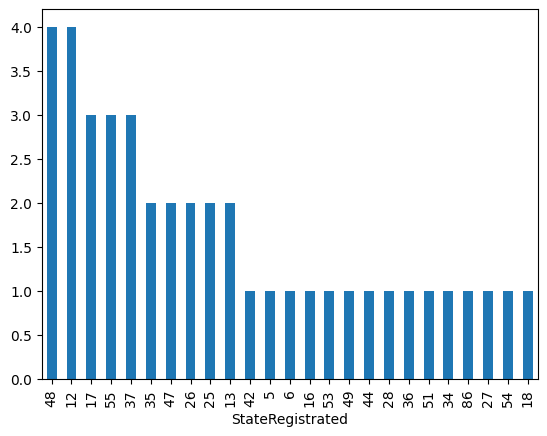

In [9]:
states.value_counts().plot.bar()